In [43]:
import pandas as pd
import seaborn as sns

In [44]:
from sklearn.feature_selection import SelectKBest,chi2

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
df=pd.read_csv(r"E:\csv\train.csv")

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [48]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [49]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [50]:
df1=pd.get_dummies(df['Sex'])

In [51]:
df1.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [52]:
df=pd.concat([df,df1],axis=1)

In [53]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [54]:
df.drop('Sex',inplace=True,axis=1)

In [55]:
le=LabelEncoder()

In [56]:
df['Embarked']=le.fit_transform(df['Embarked'])

In [57]:
df['Embarked'].head(10)

0    2
1    0
2    2
3    2
4    2
5    1
6    2
7    2
8    2
9    0
Name: Embarked, dtype: int32

In [58]:
df.dropna(inplace=True)

<AxesSubplot:>

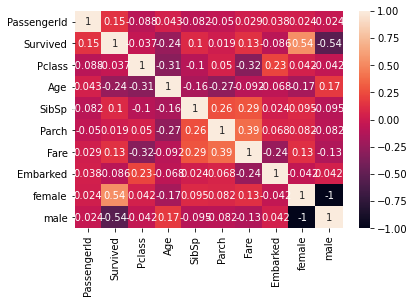

In [60]:
sns.heatmap(df.corr(),annot=True)

In [22]:
x=df.drop(['Survived','Name','Ticket','Cabin'],axis=1)

In [23]:
y=df['Survived']

In [24]:
bestfeatures=SelectKBest(score_func=chi2,k=5)

In [25]:
fit=bestfeatures.fit(x,y)

In [30]:
scores=pd.DataFrame(fit.scores_)

In [31]:
columns=pd.DataFrame(x.columns)

In [34]:
featurescore=pd.concat([columns,scores],axis=1)

In [35]:
featurescore.columns=['specs','score']

In [61]:
featurescore.nlargest(6,'score')

,specs,score
0,PassengerId,533.145114
5,Fare,242.125074
2,Age,75.537637
7,female,27.265333
8,male,25.830316
3,SibSp,1.664157


In [62]:
df=pd.read_csv(r"E:\csv\train.csv")

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [66]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [68]:
df1=pd.get_dummies(df['Sex'])

In [69]:
df=pd.concat([df,df1],axis=1)

In [82]:
df=df.drop(['Sex'],axis=1)

In [83]:
le=LabelEncoder()

In [84]:
df['Embarked']=le.fit_transform(df['Embarked'])

In [85]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,2,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,2,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,G6,2,1,0
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,C103,2,1,0
21,22,1,2,"Beesley, Mr. Lawrence",34.0,0,0,248698,13.0000,D56,2,0,1
23,24,1,1,"Sloper, Mr. William Thompson",28.0,0,0,113788,35.5000,A6,2,0,1
27,28,0,1,"Fortune, Mr. Charles Alexander",19.0,3,2,19950,263.0000,C23 C25 C27,2,0,1
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",49.0,1,0,PC 17572,76.7292,D33,0,1,0
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",65.0,0,1,113509,61.9792,B30,0,0,1


In [86]:
df.dropna(inplace=True)

<AxesSubplot:>

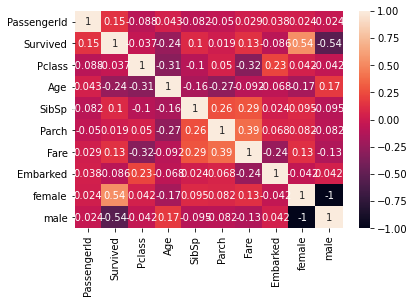

In [87]:
sns.heatmap(df.corr(),annot=True)

In [88]:
x=df.drop(['Survived','Name','Cabin','Ticket'],axis=1)

In [89]:
y=df['Survived']

In [90]:
bestfeatures=SelectKBest(score_func=chi2,k=5)

In [91]:
fit=bestfeatures.fit(x,y)

In [92]:
scores=pd.DataFrame(fit.scores_)

In [93]:
columns=pd.DataFrame(x.columns)

In [ ]:
feature